# [IAPR][iapr]: Lab 3 ‒  Classification


**Author (sciper):** Mehrdad Kiani    (269424)  


**Release date:** 07.04.2022
**Due date:** 29.04.2022


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

In [1]:
import tarfile
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.io
import pandas as pd
import seaborn as sns

In [2]:
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [3]:
data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


In [4]:
df_a = pd.DataFrame({'x':a[:,0],'y':a[:,1]})
df_b = pd.DataFrame({'x':b[:,0],'y':b[:,1]})
df_c = pd.DataFrame({'x':c[:,0],'y':c[:,1]})

### 1.1 Bayes method (5 pts)
Using the Bayes method, give the expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data. Note that you do not need to solve the analytical expression. You can simply evaluate the function for each point on the plane to end up with a segmentation map.
For simplicity reasons, round the estimated parameters to the closest integer value.

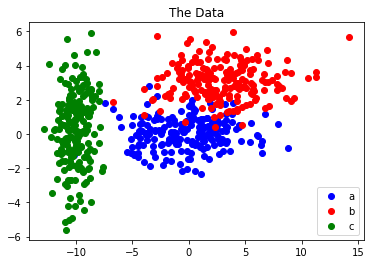

In [5]:
# scatter plot of the datasets
plt.scatter(a[:,0],a[:,1],label='a',c='blue')
plt.scatter(b[:,0],b[:,1],label='b',c='red')
plt.scatter(c[:,0],c[:,1],label='c',c='green')
plt.title('The Data')
plt.legend()
plt.show()

mean class a: [-0.  0.]
covariance class a: [[10.  0.]
 [ 0.  1.]]


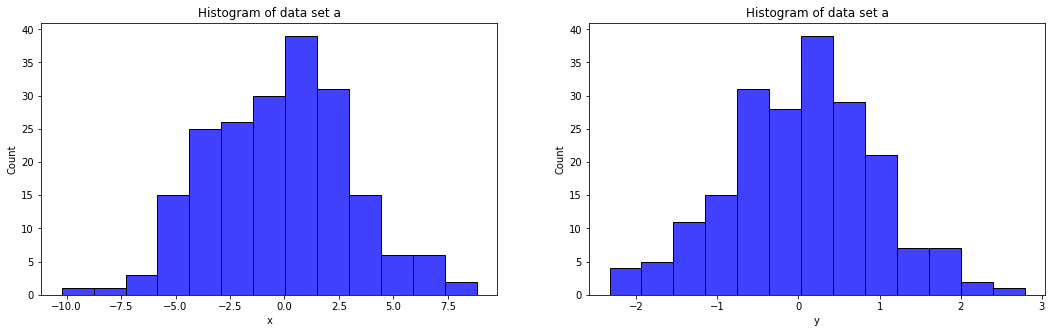

In [6]:
f, axarr = plt.subplots(nrows=1,ncols=2, figsize=(18,5))

sns.histplot(data= df_a, x  ='x', ax = axarr[0],color='b')
axarr[0].set(title='Histogram of data set a')
axarr[0].set(xlabel='x', ylabel='Count')

sns.histplot(data= df_a, x  ='y', ax = axarr[1],color='b')
axarr[1].set(title='Histogram of data set a')
axarr[1].set(xlabel='y', ylabel='Count')

mean_a = a.mean(axis=0).round()
print('mean class a:', mean_a)
cov_a = np.cov(df_a['x'], df_a['y']).round()
print('covariance class a:',cov_a)

mean class b: [3. 3.]
covariance class b: [[10.  0.]
 [ 0.  1.]]


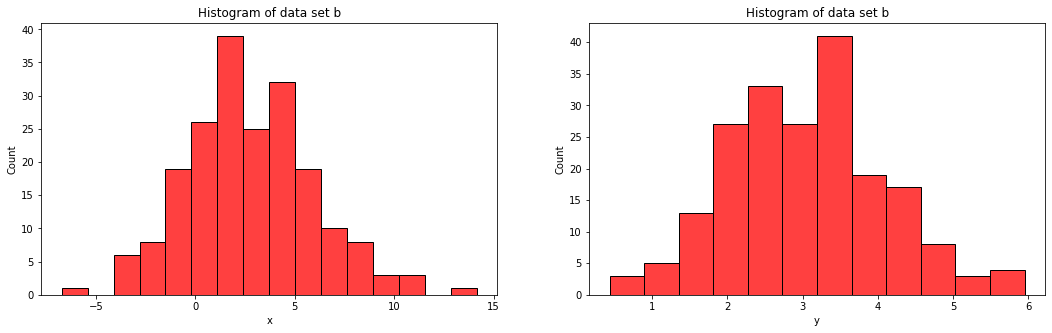

In [7]:
f, axarr = plt.subplots(nrows=1,ncols=2, figsize=(18,5))

sns.histplot(data= df_b, x  ='x', ax = axarr[0],color='r')
axarr[0].set(title='Histogram of data set b')
axarr[0].set(xlabel='x', ylabel='Count')

sns.histplot(data= df_b, x  ='y', ax = axarr[1],color='r')
axarr[1].set(title='Histogram of data set b')
axarr[1].set(xlabel='y', ylabel='Count')

mean_b = b.mean(axis=0).round()
print('mean class b:', mean_b)
cov_b = np.cov(df_b['x'], df_b['y']).round()
print('covariance class b:',cov_b)

mean class c: [-10.   0.]
covariance class a: [[1. 0.]
 [0. 5.]]


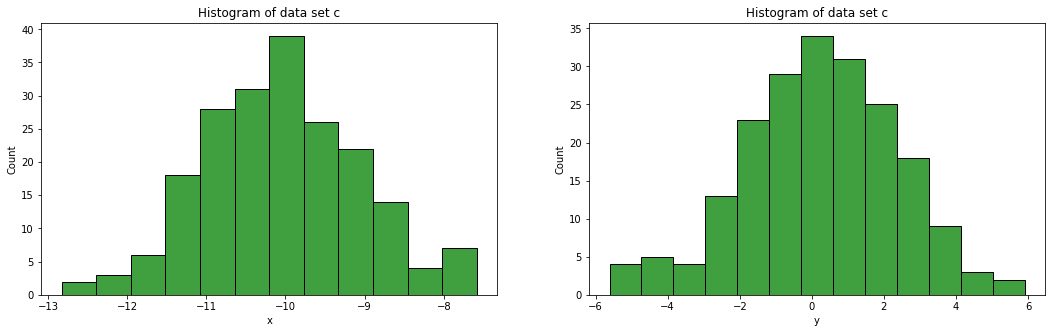

In [8]:
f, axarr = plt.subplots(nrows=1,ncols=2, figsize=(18,5))

sns.histplot(data= df_c, x  ='x', ax = axarr[0],color='g')
axarr[0].set(title='Histogram of data set c')
axarr[0].set(xlabel='x', ylabel='Count')

sns.histplot(data= df_c, x  ='y', ax = axarr[1],color='g')
axarr[1].set(title='Histogram of data set c')
axarr[1].set(xlabel='y', ylabel='Count')

mean_c = c.mean(axis=0).round()
print('mean class c:', mean_c)
cov_c = np.cov(df_c['x'], df_c['y']).round()
print('covariance class a:',cov_c)

As one can see from above histogram plots, the datasets follows a Gaussian-like distribution. Therefore, we are assuming that the distribution of the data points follows a Gaussian distribution, it is realistic. Moreover, the covariance matrix is not same for different data sets therefore we can not use special cases as mentioned in the class. We are going to use general discrimination function for the decision functions.

In [9]:
!pip install sympy

In [10]:
import sympy as sym
from sympy import *
from numpy.linalg import inv, det

 Because in the training dataset the numbers of three classes are equal, therefore the prior probabilities are equal to $1/3$. We are going to use symbolic python package to solve the $g_i(x)-g_j(x)=0.$

In [11]:
x1, x2 = symbols('x1 x2')
variables = np.array([x1, x2])
gi_a = -1/2 * (variables - mean_a).transpose().dot(inv(cov_a)).dot(variables - mean_a) + 1/3
gi_b = -1/2 * (variables - mean_b).transpose().dot(inv(cov_b)).dot(variables - mean_b) + 1/3
gi_c = -1/2 * (variables - mean_c).transpose().dot(inv(cov_c)).dot(variables - mean_c) + 1/3

In [12]:
gia_minus_gib = simplify(gi_a - gi_b)
gia_minus_gic = simplify(gi_a - gi_c)
gib_minus_gic = simplify(gi_b - gi_c)
print(gia_minus_gib)
print(gia_minus_gic)
print(gib_minus_gic)

-0.3*x1 - 3.0*x2 + 4.95
0.45*x1**2 + 10.0*x1 - 0.4*x2**2 + 50.0
0.45*x1**2 + 10.3*x1 - 0.4*x2**2 + 3.0*x2 + 45.05


In [13]:
from sympy.plotting.plot import MatplotlibBackend, Plot
def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)
    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]

C:\Users\ozden\AppData\Local\Temp/ipykernel_121336/1519483583.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


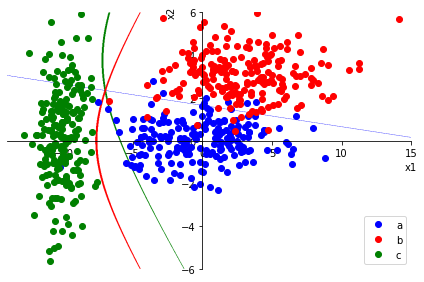

In [14]:
from sympy import plot_implicit, symbols, Eq, And
p1 = plot_implicit(Eq(-0.3*x1 - 3.0*x2 + 4.95, 0), (x1, -14, 15), (x2, -6, 6), show=False, line_color='b')
p2 = plot_implicit(Eq(0.45*x1**2 + 10.0*x1 - 0.4*x2**2 + 50.0, 0), (x1, -14, 15), (x2, -6, 6), show=False, line_color='r')
p3 = plot_implicit(Eq(0.45*x1**2 + 10.3*x1 - 0.4*x2**2 + 3.0*x2 + 45.05, 0), (x1, -14, 15), (x2, -6, 6), show=False, line_color='g')
p1.extend(p2)
p3.extend(p1)
fig, axe = get_sympy_subplots(p3)
# add additional plots
axe.plot(df_a['x'], df_a['y'],'o', label='a', c='blue')
axe.plot(df_b['x'], df_b['y'],'o', label='b', c='red')
axe.plot(df_c['x'], df_c['y'],'o', label='c', c='green')
plt.legend()
fig.show()

### 1.2 Mahalanobis distance (5 pts)
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

If $\Sigma$ is not diagonal: the most probable class is the one that maximize $g_i(x)$, i.e., which minimize the Mahalanobis distance:
\begin{align}
d_m=\Bigg((x-\mu_{i})\Sigma_{i}^{-1}(x-\mu_{i})\Bigg)^{1/2}\\
\end{align}

In [15]:
dm_a = sqrt((variables - mean_a).transpose().dot(inv(cov_a)).dot(variables - mean_a))
dm_b = sqrt((variables - mean_b).transpose().dot(inv(cov_b)).dot(variables - mean_b))

In [16]:
print('The Mahalanobis distance formula for class a: ',dm_a)
print('The Mahalanobis distance formula for class b:', dm_b)

The Mahalanobis distance formula for class a:  sqrt(0.1*x1**2 + 1.0*x2**2)
The Mahalanobis distance formula for class b: sqrt((0.1*x1 - 0.3)*(x1 - 3.0) + (x2 - 3.0)*(1.0*x2 - 3.0))


For new points which are selected randomly, the Mahalanobis distance is calculated and minimum one determine which group the point belongs. Moreover, we calculate $g_i(a)-g_i(b)$ and the sign of the expression determine if it belongs to group "a" or "b" (positive: group "a" and negative: "b").

In [17]:
x_coord = [np.random.randint(-14,14) for x in range(10)]
y_coord = [np.random.randint(-6,6) for x in range(10)]

Feature_vector = [(x,y) for x,y in zip(x_coord,y_coord)]
Feature_vector

[(9, 2),
 (-9, -4),
 (12, 4),
 (-2, -1),
 (-5, 4),
 (12, -6),
 (11, -5),
 (-4, 3),
 (-13, 1),
 (12, 2)]

In [18]:
Mahalanobis = []
for i in range(0,len(x_coord)):
    distance_a = dm_a.evalf(10, subs={x1: x_coord[i], x2:y_coord[i]})
    distance_b = dm_b.evalf(10, subs={x1: x_coord[i], x2:y_coord[i]})
    if (distance_a > distance_b):
        Mahalanobis.append('b')
    elif (distance_a < distance_b):
        Mahalanobis.append('a')

In [19]:
Bayesian=[]
for i in range(0,len(x_coord)):
    if (gia_minus_gib.evalf(10, subs={x1: x_coord[i], x2:y_coord[i]}) > 0):
        Bayesian.append('a')
    elif (gia_minus_gib.evalf(10, subs={x1: x_coord[i], x2:y_coord[i]}) < 0):
        Bayesian.append('b')

In [20]:
print('Class label using Mahalanobis distnace    =', Mahalanobis)    
print('Class label using Multivariative Gaussian =', Bayesian)  

Class label using Mahalanobis distnace    = ['b', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'a', 'b']
Class label using Multivariative Gaussian = ['b', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'a', 'b']


In [21]:
import tarfile
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.io
import pandas as pd
import seaborn as sns

In [22]:
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python. 

**! Warning**: When the lab was created the official MNIST repo was down, if it is still the case please use https://github.com/mkolod/MNIST.

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [23]:
import gzip
import numpy as np
import matplotlib.pyplot as plt


def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [24]:
image_shape    = (28, 28)
train_set_size = 60000
test_set_size  = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path  = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path  = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images  = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels  = extract_labels(test_labels_path, test_set_size)

[48824 11932 11570  6105  4442 17181  8684 49927 44794 38116]


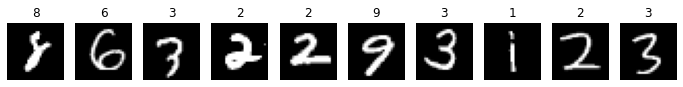

In [25]:
prng    = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)
print(plt_ind)
fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP (10 pts)

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

---

We used as a guide the Scikit-learn example for Classification algorithms of [this link](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py).

In [26]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

We need to flatten the images before using them in the process.

In [27]:
# flatten the images
n_train = len(train_images)
n_test  = len(test_images) 

# Print the size of test and training sets.
print(n_train)
print(n_test)

# Flatten and stacking the image vectors.
train_images_flat = train_images.reshape((n_train, -1))
test_images_flat  = test_images.reshape((n_test, -1))

# Check the shape of the input vectors.
print(shape(train_images_flat))
print(shape(test_images_flat))

60000
10000
(60000, 784)
(10000, 784)


#### MLP


We define a consufion matrix to compare the results of the predicted label with the real ones. To do so, we define a function **accuracy** based on what we found on [this link](https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/).

In [28]:
from sklearn.metrics import confusion_matrix

def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

We define as well a function to plot the confusion matrix for the problems adapted from [this link](https://github.com/ViniciusAyres/mlpclassifier-digits-dataset/blob/master/MLPClassifier.ipynb):

In [29]:
import itertools

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

We start by creating the classifier objects by using three different solvers: **lbfgs, sgd,** and **adam**. As requested, we define them with 100 hidden layers. We set a fixed random state to be able to reproduce the same results. 

In [30]:
from sklearn.neural_network import MLPClassifier

clf_lbfgs = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,), random_state=1)

clf_sgd = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(100,), random_state=1)

clf_adam = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(100,), random_state=1)

Once they are defined, we train the three of them with the training set.

In [31]:
clf_lbfgs.fit(train_images_flat, train_labels)
clf_sgd.fit(train_images_flat, train_labels)
clf_adam.fit(train_images_flat, train_labels)

c:\users\ozden\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\ozden\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, random_state=1)

We get a warning regarding the maximum number of iterations. We will adress this issue below.

We use the trained classifiers for predicting the labels of the test set:

In [32]:
y_pred_lbfgs = clf_lbfgs.predict(test_images_flat)
y_pred_sgd = clf_sgd.predict(test_images_flat)
y_pred_adam = clf_adam.predict(test_images_flat)

We compute the confusion matrix to compare predictions with real values:

In [33]:
cm_lbfgs = confusion_matrix(y_pred_lbfgs, test_labels)
cm_sgd = confusion_matrix(y_pred_sgd, test_labels)
cm_adam = confusion_matrix(y_pred_adam, test_labels)

We plot the matrix and print the accuracy of the predictor for the three tested models.

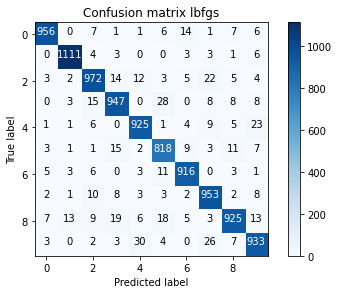

Accuracy of MLPClassifier lbfgs: 0.9456


In [34]:
plt.figure()
plot_confusion_matrix(cm_lbfgs,
                      title='Confusion matrix lbfgs')
plt.show()
print("Accuracy of MLPClassifier lbfgs:", accuracy(cm_lbfgs))

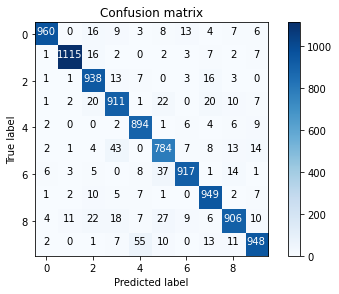

Accuracy of MLPClassifier sgd: 0.9322


In [35]:
plt.figure()
plot_confusion_matrix(cm_sgd,
                      title='Confusion matrix')
plt.show()
print("Accuracy of MLPClassifier sgd:", accuracy(cm_sgd))

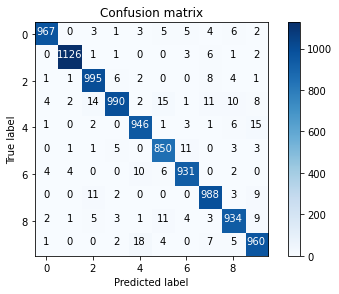

Accuracy of MLPClassifier adam: 0.9687


In [36]:
plt.figure()
plot_confusion_matrix(cm_adam,
                      title='Confusion matrix')
plt.show()
print("Accuracy of MLPClassifier adam:", accuracy(cm_adam))

We can see that the results are quite good for all the three solvers tested, all of them over 90% of success. From them, it was the **adam solver** the one with the best performance (over 96.6% of success).

From the results we can see the power of MLP Classifiers to distinguish between digits, compared to what was done in the previous lab. For a simple process like this, it is a big improvement compared with more rudimentary tools like FFT classifiers. The computational effort is small for the accuracy of the results we get. However, it is expected that for bigger pictures the consumption of resources would increase notably.